In [1]:
# Import packages
import pprint 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Load data and summary
train = pd.read_csv('train.csv')
print('colunms: ', train.columns.to_list())
train

colunms:  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
train.isnull().values.sum()

2324

In [4]:
# split PassengerId, Cabin, Name, and add TotalSpending
train['PassengerGroup'] = train['PassengerId'].apply(lambda x: int(x.split('_')[0]))
train['PassengerNum'] = train['PassengerId'].apply(lambda x: int(x.split('_')[1]))
train['CabinDeck'] = train['Cabin'].apply(lambda x: str(x).split('/')[0] if bool(re.search('[A-Za-z]/[0-9]+/[A-Za-z]', str(x))) else x)
train['CabinNum'] = train['Cabin'].apply(lambda x: str(x).split('/')[1] if bool(re.search('[A-Za-z]/[0-9]+/[A-Za-z]', str(x))) else x).astype(int, errors='ignore')
train['CabinSide'] = train['Cabin'].apply(lambda x: str(x).split('/')[2] if bool(re.search('[A-Za-z]/[0-9]+/[A-Za-z]', str(x))) else x)
train['FirstName'] = train['Name'].apply(lambda x: str(x).split()[0] if len(str(x)) > 0 else x)
train['LastName'] = train['Name'].apply(lambda x: str(x).split()[1] if len(str(x).split()) > 1 else x)
train['TotalSpend'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train['RoomService'] = train['RoomService'].apply(lambda x: np.log(x+1))
train['FoodCourt'] = train['FoodCourt'].apply(lambda x: np.log(x+1))
train['ShoppingMall'] = train['ShoppingMall'].apply(lambda x: np.log(x+1))
train['Spa'] = train['Spa'].apply(lambda x: np.log(x+1))
train['VRDeck'] = train['VRDeck'].apply(lambda x: np.log(x+1))
train['TotalSpend'] = train['TotalSpend'].apply(lambda x: np.log(x+1))

print('colunms: ', train.columns.to_list())
train

colunms:  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'PassengerGroup', 'PassengerNum', 'CabinDeck', 'CabinNum', 'CabinSide', 'FirstName', 'LastName', 'TotalSpend']


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNum,CabinDeck,CabinNum,CabinSide,FirstName,LastName,TotalSpend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,...,Maham Ofracculy,False,1,1,B,0,P,Maham,Ofracculy,0.000000
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,...,Juanna Vines,True,2,1,F,0,S,Juanna,Vines,6.602588
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,...,Altark Susent,False,3,1,A,0,S,Altark,Susent,9.248021
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,...,Solam Susent,False,3,2,A,0,S,Solam,Susent,8.551981
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,...,Willy Santantines,True,4,1,F,1,S,Willy,Santantines,6.995766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.000000,8.827615,0.000000,...,Gravior Noxnuther,False,9276,1,A,98,P,Gravior,Noxnuther,9.052165
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.000000,0.000000,0.000000,...,Kurta Mondalley,False,9278,1,G,1499,S,Kurta,Mondalley,0.000000
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.000000,0.000000,7.535297,...,Fayey Connon,True,9279,1,G,1500,S,Fayey,Connon,7.535830
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.000000,6.956545,0.000000,...,Celeon Hontichre,False,9280,1,E,608,S,Celeon,Hontichre,8.442039


## Missing Values

[Nan Text - intro]

In [5]:
print('Percentage of NA in each columns')
train.isna().sum()/train.shape[0]*100

Percentage of NA in each columns


PassengerId        0.000000
HomePlanet         2.312205
CryoSleep          2.496261
Cabin              2.289198
Destination        2.093639
Age                2.059128
VIP                2.335212
RoomService        2.082135
FoodCourt          2.105142
ShoppingMall       2.392730
Spa                2.105142
VRDeck             2.162660
Name               2.300702
Transported        0.000000
PassengerGroup     0.000000
PassengerNum       0.000000
CabinDeck          2.289198
CabinNum           2.289198
CabinSide          2.289198
FirstName          0.000000
LastName           2.300702
TotalSpend        10.445186
dtype: float64

In [6]:
# Check which rows have null values
nan_rows = train[train.isnull().T.any()]

nan_rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNum,CabinDeck,CabinNum,CabinSide,FirstName,LastName,TotalSpend
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.000000,0.000000,0.000000,...,Candra Jacostaffey,True,6,2,G,0,S,Candra,Jacostaffey,NaN
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.000000,0.000000,NaN,...,Altardr Flatic,True,8,2,B,1,P,Altardr,Flatic,NaN
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,3.496508,0.000000,6.776507,...,Justie Pooles,False,12,1,NaN,NaN,NaN,Justie,Pooles,6.812345
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,7.160069,4.812184,NaN,...,Flats Eccle,False,14,1,F,3,P,Flats,Eccle,NaN
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.000000,0.000000,NaN,...,Mollen Mcfaddennon,False,20,3,E,0,S,Mollen,Mcfaddennon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.000000,7.997327,NaN,...,Chain Reedectied,True,9250,1,E,597,P,Chain,Reedectied,NaN
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,3.688879,0.000000,6.990257,...,Ties Apple,False,9257,1,F,1892,P,Ties,Apple,7.046647
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,6.938284,6.923629,0.000000,...,Annah Gilleyons,True,9259,1,F,1893,P,Annah,Gilleyons,NaN
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.000000,0.000000,0.000000,...,Chelsa Bullisey,True,9274,1,G,1508,P,Chelsa,Bullisey,0.000000


## EDA Functions

In [7]:
def get_counts(feature1, feature2, value):
    return train[feature1][train[feature2] == value].value_counts()

In [8]:
# Plot colors
destination_colors = ['#451952', '#AE445A', '#F39F5A']

def plot_transported(data_dict, feature_values, title):
    '''Returns a grouped bar chart comparing transported
    outcome between values of the feature
    
    Args: 
        data_dict = dictionary of transported vs not transported 
                    with number of passengers for each
        feature = a list of the feature's unique values
        
    
    Return: grouped bar plot
    '''
    
    x = np.arange(len(feature_values))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for feature, count in data_dict.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, 
                       count, 
                       width, 
                       edgecolor = 'white',
                       label = feature,
                       color = destination_colors[multiplier + 1])
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('No. of Passengers')
    ax.set_title(title)
    ax.set_xticks(x + width, feature_values)
    ax.legend(loc='upper center', ncols=1)

    plt.show()
    


In [9]:
def transported_data(feature1='Transported',
                     feature2 = 'HomePlanet',
                     values_list = []):
    '''Takes in two features, assuming the first is transported status and 
    prints the value counts for transported vs. not for each unique value of 2nd feature
    
    Also returns a data dictionary for plotting transported vs. not transported
    
    Args:
        feature1 = the feature to count
        feature2 = the feature with unique values to group the counts
        values_list = the list of unique values in feature2
        
    Returns:
        a data dictionary of Transported and non-transported values for the plot
    
    '''
    
    
    transported_data = []
    not_transported_data = []
    
    for i in values_list:
        stored_series = get_counts(feature1, feature2, i)
        print(i, 'Passengers -', feature1)
        print(stored_series)
        print()
        transported_data.append(stored_series[True])
        not_transported_data.append(stored_series[False])
        
    data_dict = {
        'Transported': tuple(transported_data),
        'Not Transported': tuple(not_transported_data)
    }
    
    return data_dict

### HomePlanet

[home planet intro text goes here]

In [10]:
print('Number of Passengers for Destination')
train['Destination'].value_counts()

Number of Passengers for Destination


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [11]:
planets = ['Earth', 'Mars', 'Europa']
destinations = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']

In [12]:
planets_transport = transported_data('Transported', 'HomePlanet', planets)

Earth Passengers - Transported
False    2651
True     1951
Name: Transported, dtype: int64

Mars Passengers - Transported
True     920
False    839
Name: Transported, dtype: int64

Europa Passengers - Transported
True     1404
False     727
Name: Transported, dtype: int64



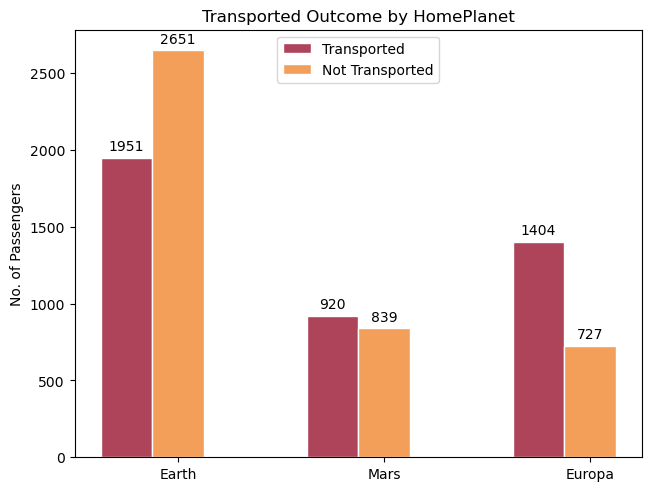

In [13]:
plot_transported(planets_transport, planets, 'Transported Outcome by HomePlanet')

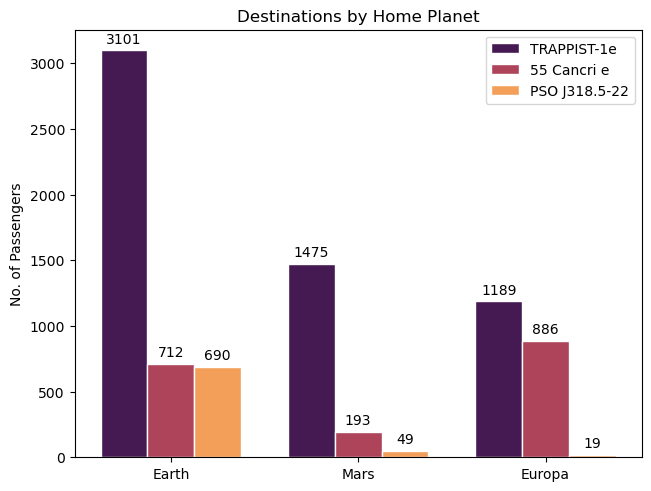

In [14]:
earth_destinations = get_counts('Destination', 'HomePlanet', 'Earth')
mars_destinations = get_counts('Destination', 'HomePlanet', 'Mars')
europa_destinations = get_counts('Destination', 'HomePlanet', 'Europa')

destination_counts = {
    'TRAPPIST-1e': (earth_destinations[0], mars_destinations[0], europa_destinations[0]),
    '55 Cancri e': (earth_destinations[1], mars_destinations[1], europa_destinations[1]),
    'PSO J318.5-22': (earth_destinations[2], mars_destinations[2], europa_destinations[2])
}


x = np.arange(len(planets))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for destination, count in destination_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, 
                   count, 
                   width, 
                   label=destination,
                   color = destination_colors[multiplier],
                   edgecolor = 'white')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Passengers')
ax.set_title('Destinations by Home Planet')
ax.set_xticks(x + width, planets)
ax.legend(loc='upper right', ncols=1)

plt.show()

In [15]:
# Check the distribution of passengers by cabin deck
earth_cabins = get_counts('CabinDeck', 'HomePlanet', 'Earth')
mars_cabins = get_counts('CabinDeck', 'HomePlanet', 'Mars')
europa_cabins = get_counts('CabinDeck', 'HomePlanet', 'Europa')


print("Earth Passengers by Cabin Deck")
print(earth_cabins.sort_values())
print()

print("Mars Passengers by Cabin Deck")
print(mars_cabins.sort_values())
print()

print("Europa Passengers by Cabin Deck")
print(europa_cabins)

Earth Passengers by Cabin Deck
E     395
F    1614
G    2498
Name: CabinDeck, dtype: int64

Mars Passengers by Cabin Deck
D     282
E     330
F    1110
Name: CabinDeck, dtype: int64

Europa Passengers by Cabin Deck
B    766
C    734
A    252
D    186
E    128
T      4
Name: CabinDeck, dtype: int64


### CryoSleep

[cryosleep intro text goes here]

In [16]:
sleep_status = [True, False]

sleep_transport = transported_data('Transported', 'CryoSleep', sleep_status)

True Passengers - Transported
True     2483
False     554
Name: Transported, dtype: int64

False Passengers - Transported
False    3650
True     1789
Name: Transported, dtype: int64



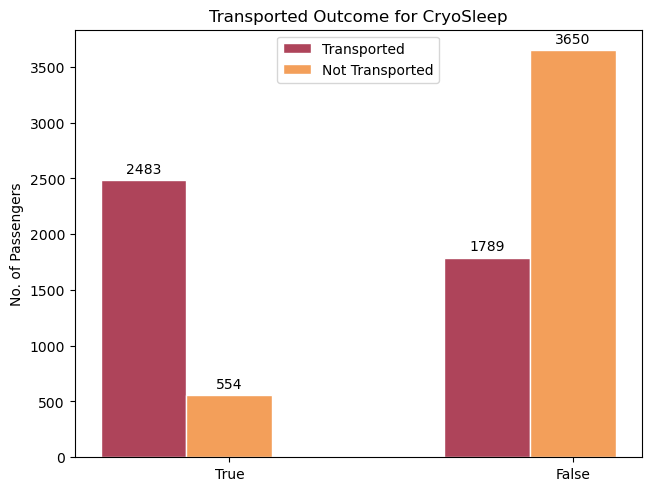

In [17]:
plot_transported(
    sleep_transport,
    sleep_status,
    'Transported Outcome for CryoSleep')

In [18]:
# People in cryo sleep cannot spend money on ship services
train[train['CryoSleep'] == True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,PassengerNum,TotalSpend
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0,3037.000000,3037.000000,2690.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0,4608.302601,1.608824,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0,2686.395531,1.127171,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,6.000000,1.000000,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0,2329.000000,1.000000,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0,4580.000000,1.000000,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0,6858.000000,2.000000,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0,9278.000000,8.000000,0.0


In [19]:
# look at $0 for train, awake
train[train['CryoSleep'] == False][train['TotalSpend'] == 0].describe()

/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_96881/865120797.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train['CryoSleep'] == False][train['TotalSpend'] == 0].describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,PassengerNum,TotalSpend
count,463.000000,470.0,470.0,470.0,470.0,470.0,470.000000,470.000000,470.0
mean,10.336933,0.0,0.0,0.0,0.0,0.0,4528.106383,2.174468,0.0
std,12.741302,0.0,0.0,0.0,0.0,0.0,2694.056355,1.407938,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0
25%,1.500000,0.0,0.0,0.0,0.0,0.0,2180.000000,1.000000,0.0
50%,7.000000,0.0,0.0,0.0,0.0,0.0,4432.000000,2.000000,0.0
75%,11.500000,0.0,0.0,0.0,0.0,0.0,6785.000000,3.000000,0.0
max,71.000000,0.0,0.0,0.0,0.0,0.0,9275.000000,8.000000,0.0


### Cabin

[cabin text goes here]

#### Cabin Deck

In [20]:
# Check if passengers are equally distributed across decks
print('Distribution of Passengers by CabinDeck')
print(train['CabinDeck'].value_counts().sort_values())

Distribution of Passengers by CabinDeck
T       5
A     256
D     478
C     747
B     779
E     876
G    2559
F    2794
Name: CabinDeck, dtype: int64


In [21]:
decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

# Check if transport rate is similar across decks
cabin_transport = transported_data('Transported', 'CabinDeck', decks)

A Passengers - Transported
False    129
True     127
Name: Transported, dtype: int64

B Passengers - Transported
True     572
False    207
Name: Transported, dtype: int64

C Passengers - Transported
True     508
False    239
Name: Transported, dtype: int64

D Passengers - Transported
False    271
True     207
Name: Transported, dtype: int64

E Passengers - Transported
False    563
True     313
Name: Transported, dtype: int64

F Passengers - Transported
False    1565
True     1229
Name: Transported, dtype: int64

G Passengers - Transported
True     1321
False    1238
Name: Transported, dtype: int64

T Passengers - Transported
False    4
True     1
Name: Transported, dtype: int64



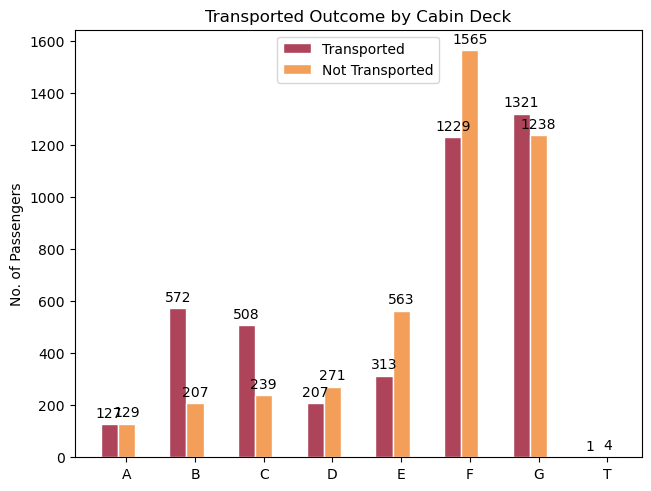

In [22]:
plot_transported(
    cabin_transport,
    decks,
    'Transported Outcome by Cabin Deck')

### Cabin Numbers

In [23]:
train = train.astype({'CabinNum' : 'float32'})

def filter_cabin(letter):
    '''Returns a df with only passengers from a specific deck'''
    return train[train['CabinDeck'] == letter]

In [24]:
print('Cabin Number Ranges')
for deck in decks:
    deck_subset = filter_cabin(deck)
    print('Deck', 
          deck, 
          int(min(deck_subset['CabinNum'])),
          '-',
          int(max(deck_subset['CabinNum'])))

Cabin Number Ranges
Deck A 0 - 107
Deck B 0 - 353
Deck C 0 - 342
Deck D 0 - 295
Deck E 0 - 608
Deck F 0 - 1894
Deck G 0 - 1508
Deck T 0 - 3


In [25]:
def cabin_num_plots(deck):
    deck = filter_cabin(deck)

    # Create lists then set
    # Used for histograms of cabin number distribution
    # Use set to find cabin numbers where all passengers per room were transported
    transported_nums = list(deck[deck['Transported'] == True]['CabinNum'])
    not_transported_nums = list(deck[deck['Transported'] == False]['CabinNum'])
    transported_only = list(set(transported_nums) - set(not_transported_nums))

    plt.hist(np.array(list(deck['CabinNum'])),
            color = "white",
            edgecolor = destination_colors[0],
            alpha = 0.5,
            label = 'All Deck Passengers')
    
    # Look at whether sleepers are grouped in specific cabin numbers or not
    deck_sleep_cabins = list(deck[deck['CryoSleep'] == True]['CabinNum'])

    plt.hist(np.array(deck_sleep_cabins),
            color = destination_colors[1],
            edgecolor = 'white',
            label = 'Asleep')

    # Check side distribution for sleepers
    deck['CabinSide'][deck['CryoSleep'] == True].value_counts()


    # Distribution across cabin numbers where all cabin passengers were transported people
    plt.hist(np.array(transported_only),
            color = destination_colors[2],
            edgecolor = "white",
            label = 'Transported',
            alpha = 0.6)
    
    plt.title('Asleep vs. Transported Numbers by Cabin Numbering')
    plt.xlabel('Cabin Numbering')
    plt.ylabel('Passenger Count')
    plt.legend()

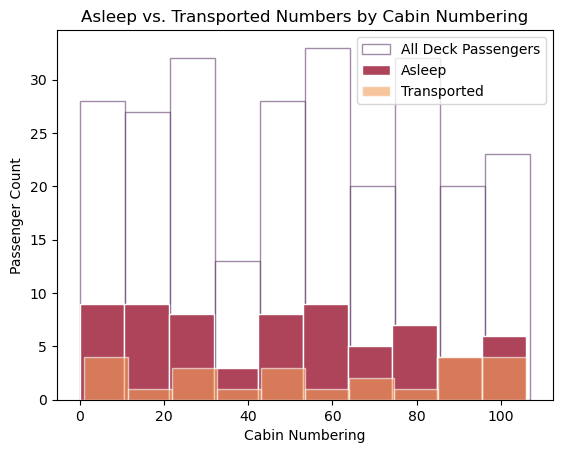

In [26]:
cabin_num_plots('A')

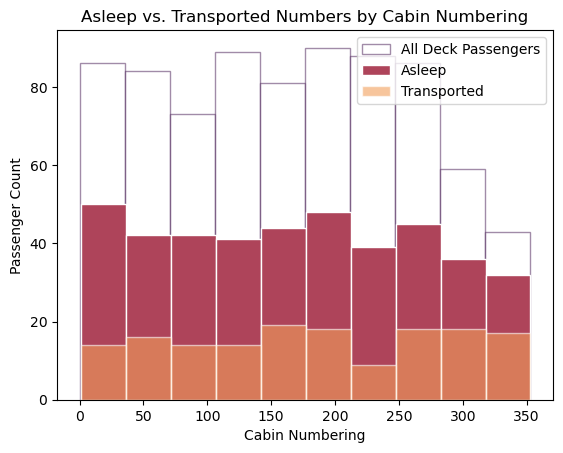

In [27]:
cabin_num_plots('B')

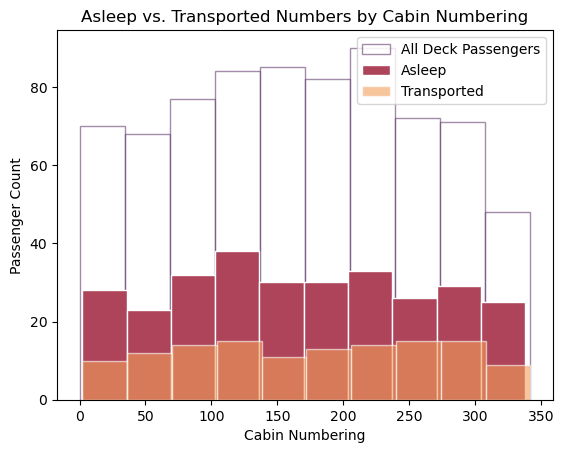

In [28]:
cabin_num_plots('C')

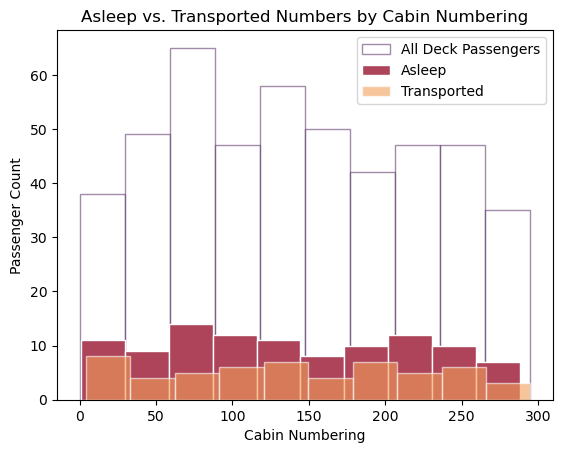

In [29]:
cabin_num_plots('D')

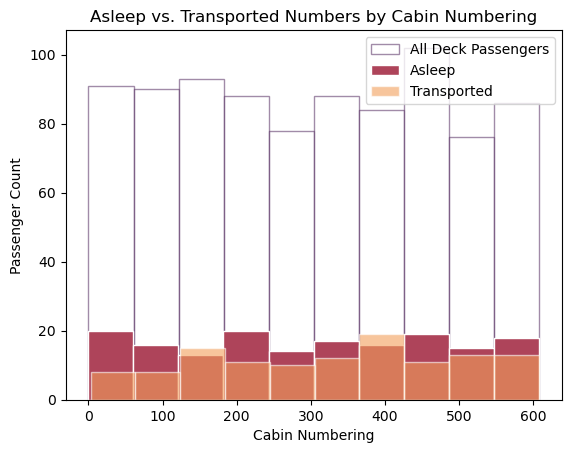

In [30]:
cabin_num_plots('E')

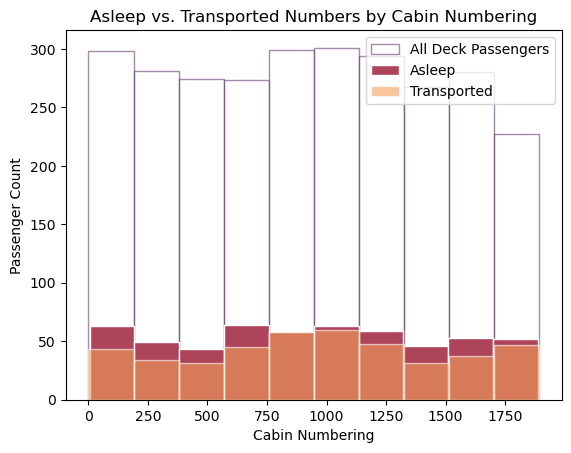

In [31]:
cabin_num_plots('F')

In [32]:
# All asleep passengers on Deck F, Number 751 - 1249 were transported
f = filter_cabin('F')
f['Transported'][f['CabinNum'] > 750][f['CabinNum'] < 1250][f['CryoSleep'] == True].value_counts()

# Suggests physical location of a the passenger at the time of the collision is important
# Asleep people must be in their cabin

True    161
Name: Transported, dtype: int64

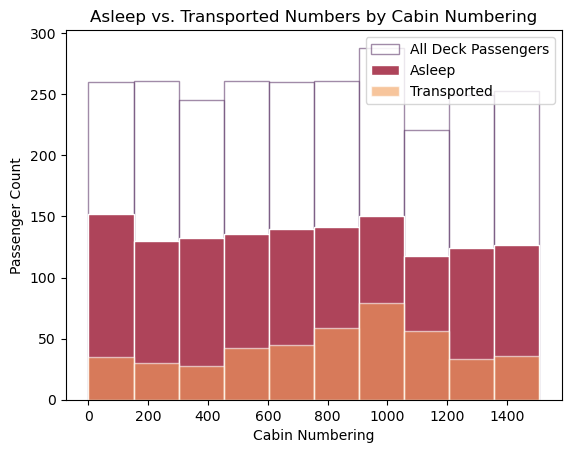

In [33]:
cabin_num_plots('G')

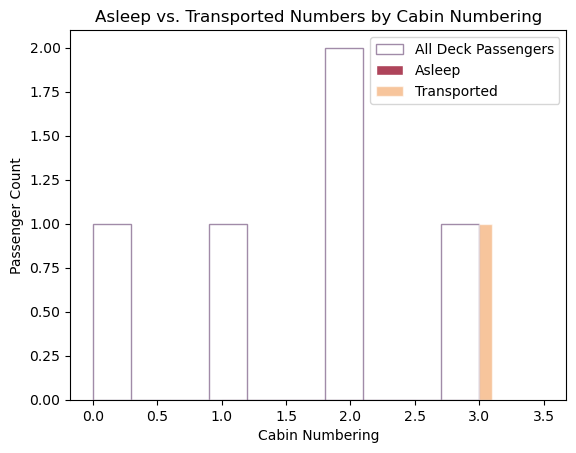

In [34]:
cabin_num_plots('T')

In [35]:
# 3d plot of asleep people with transported or not
# plot with three axes: cabin deck, cabin number, and cabin side

### Destination

[destination intro text goes here]

In [36]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [39]:
destination_transported = transported_data('Transported', 'Destination', destinations)

TRAPPIST-1e Passengers - Transported
False    3128
True     2787
Name: Transported, dtype: int64

55 Cancri e Passengers - Transported
True     1098
False     702
Name: Transported, dtype: int64

PSO J318.5-22 Passengers - Transported
True     401
False    395
Name: Transported, dtype: int64



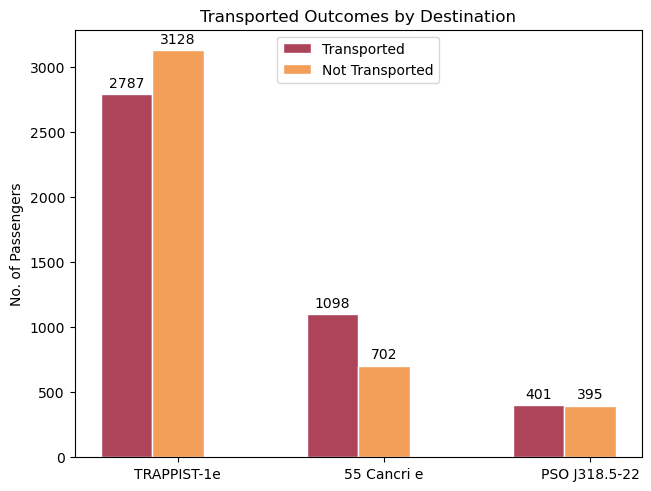

In [40]:
plot_transported(destination_transported,
                 destinations,
                'Transported Outcomes by Destination')